# Explanatory Analysis of *Prospers* Loan Data

In [1]:
#Load in Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True;

In [2]:
#First load in the CSV file
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## What we will learn?
This presenation aims to explain the findings of our analysis of *Prospers* Loan Data, in this analysis, we will explore the ins and outs of finances across soceity by looking into the following:
- Which credit ratings are most popular to lenders?
- Which professions and states are most prosperous financially?

Breakdown:
- Tell a story
    - Start with a question
    - Repitition of the problem
    - Provide data that reports the answer to the question
    - Call your audience to action

## Which credit ratings are most popular for the lenders?

Let's first start by looking into a breakdown of Loans of based on Credit Grade?

In [3]:
#Nulls dropped initially
CG = df.CreditGrade.dropna()
CG = sorted(list(CG.unique()))
CG 

['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']

In [4]:
#Swap the positions of AA and A
def swapPositions(list, pos1, pos2): 
      
    list[pos1], list[pos2] = list[pos2], list[pos1] 
    return list
  
# Driver function 

swapPositions(CG, 0, 1)

['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

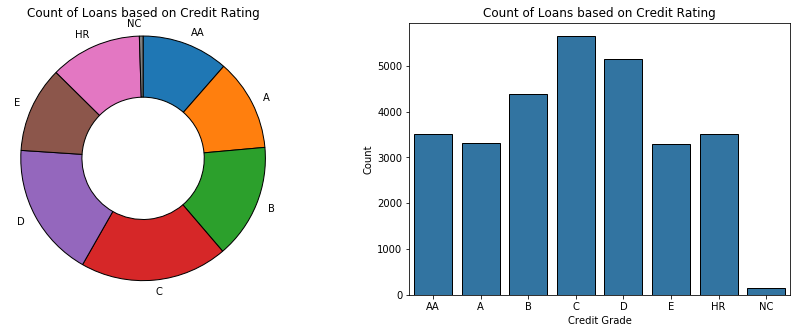

In [5]:
plt.figure(figsize = [15, 5])
sorted_counts = df['CreditGrade'].value_counts().sort_index()
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = CG, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');
plt.title('Count of Loans based on Credit Rating');

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
values = df['CreditGrade']
sb.countplot(data = df, x='CreditGrade', color = base_color, order = CG)
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.title('Count of Loans based on Credit Rating');

The previous data shows that the lenders most popular Credit Grades to lend to are the mid grades, this may be due simply to the fact that the majority of the market have mid-level credit ratings, however is there any other reason for these loans being popular to the banks?

### Lender Yield against Credit Grade
Let's look at how much the lender expects to return based on Credit Grade using a violin plot

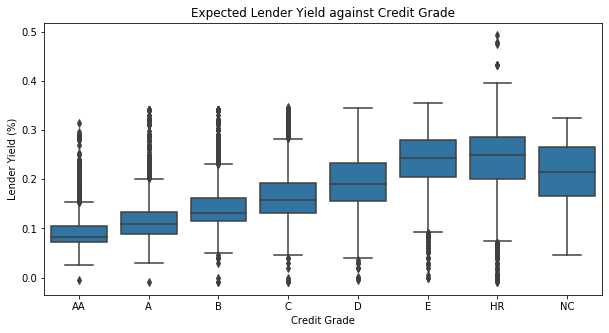

In [6]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'CreditGrade', y = 'LenderYield', color = base_color, order = CG)
plt.xlabel('Credit Grade')
plt.ylabel('Lender Yield (%)')
plt.title('Expected Lender Yield against Credit Grade');

### Why do banks lend most frequently to mid level Credit Grades
The graph on the previous page shows the typically the worse a Credit Grade, the more varience there is in the Lender Yield. This resultantly means increased risk but possible higher reward for the lender. The mid-level Credit Grades strike a good balance with reasonably low variance but a slightly higher yield. Hence these are favourable Credit Grades to lenders.

### What does this mean for me?
Although the banks appear to most frequently lend to mid-level lenders, those with the higher credit ratings typically recieve loans with lower lender yields. Therefore, unsurprisingly if you want the best loans getting a high credit rating is the way to go!

## Which professions are most lucrative?
Within this section, we shall analysis the top ten most 'lucrative' professions within the US. To make the analysis more relevent to the majority we have removed the super-salaries of those earning more than $20,000 per month from this analysis. 

In [7]:
#Compile Occupation average incomes
df3 = df
df3 = df3[df3['StatedMonthlyIncome']<= 20000]
df3.head()
df3.shape

(112748, 81)

In [8]:
df3 = df3[['Occupation', 'StatedMonthlyIncome']]
df4 = df3.groupby(['Occupation']).mean()
df4 = df4.sort_values(['StatedMonthlyIncome'],ascending=False).head(10)
wealthiestjobs = list(df4.index)
wealthiestjobs

['Judge',
 'Doctor',
 'Pharmacist',
 'Attorney',
 'Executive',
 'Dentist',
 'Pilot - Private/Commercial',
 'Engineer - Chemical',
 'Principal',
 'Military Officer']

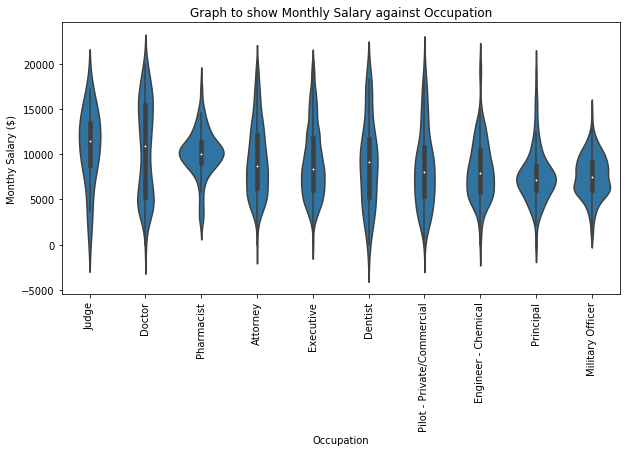

In [9]:
plt.figure(figsize = [10, 5])
WJobs = pd.api.types.CategoricalDtype(ordered = True, categories = wealthiestjobs)
df3['Occupation'] = df3['Occupation'].astype(WJobs)
sb.violinplot(data = df3, x = 'Occupation', y = 'StatedMonthlyIncome', color=base_color)
plt.xticks(rotation = 90)
plt.ylabel('Monthy Salary ($)');
plt.title('Graph to show Monthly Salary against Occupation');

### Which professions are most well paid?
on Initial reiew being a judge has the highest average salary (median & mean) when excluding earnings above $20,000 per month. A military officer makes up the top ten in tenth place. When  looking further into the data we can see that the top two earning professions have a large degree of variance.

### Which profession should I do if I want a consistently well paid job?
When looking at the distribution of the violin plots we can see that Pharmacists have little variance. They are quite consistently paid around \\$10,000 per month. Similarly, military officers have consistent salaries albeit slightly lower centering around \\$7,500 per month. 


## Conclusions
To conclude, we have seen that lenders most frequently lend to mid grade credit levels, in part one reason for this may be the decent, yet stable returns lending to people within mid-grade provides.

In the second part of our analysis we found that Judges have the highest average earnings of any *typical* profession within the US. They had a large degree of variance in salaries however, facting this in it could be argued that pharmacists have the most consistently well paid job. 

# Thank you